In [15]:
import scipy
import numpy as np
from matplotlib import pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if np.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

### Task 1

In [13]:
SIZE = 20
NUM_ITER = 200
NUM_STEPS = int(1e5)

avg_magns = []

for it in range(NUM_ITER):
    sim = IsingSimulation(SIZE, temperature=1)  # Ising model at the Curie temperature
    for _ in range(NUM_STEPS):
        sim.update()
    avg_magns.append(sim.average_magnetism())

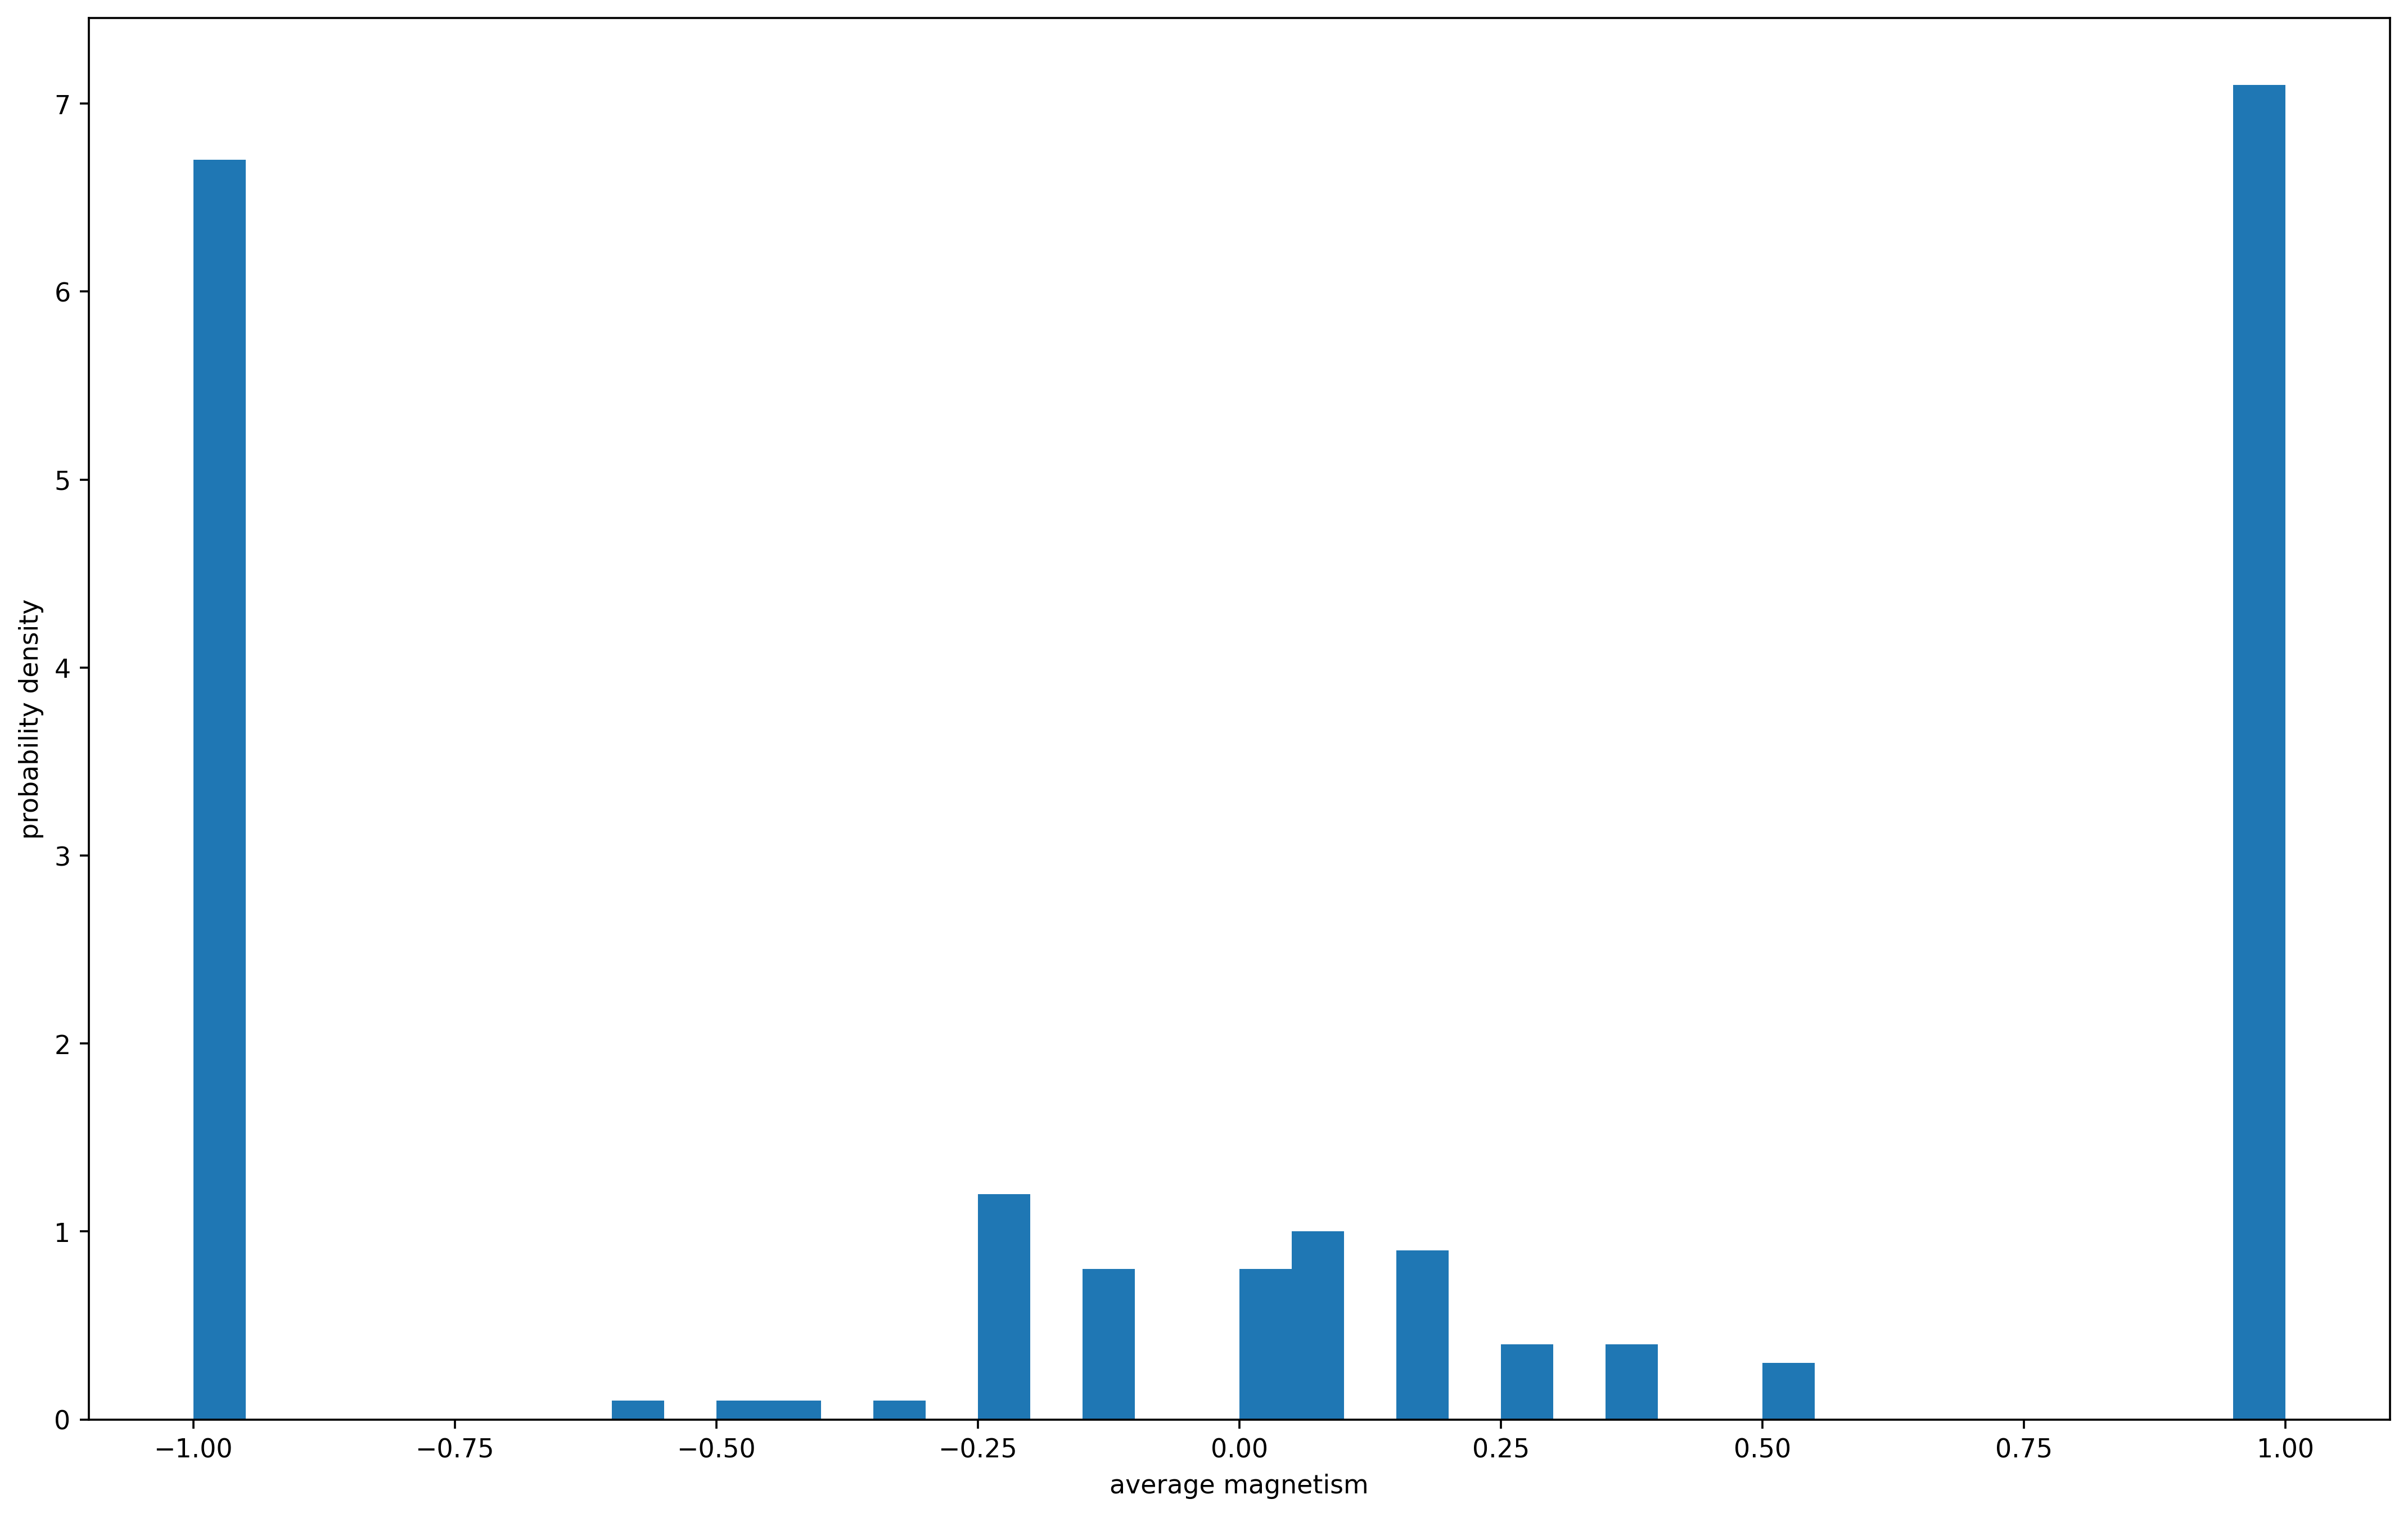

In [18]:
plt.figure(figsize=(16, 10), dpi=330)
plt.hist(avg_magns, bins=40, density=True)
plt.xlabel('average magnetism')
plt.ylabel('probability density')
plt.show()

### Task 2

In [20]:
INIT_TEMP = 2000  # Kelvin
STEP_TEMP = 1
END_TEMP = 1

avg_magns_2 = []

for it in range(NUM_ITER):
    cur_temp = INIT_TEMP
    sim = IsingSimulation(SIZE, temperature=INIT_TEMP)  # Ising model at the Curie temperature
    step_count = 0
    
    while cur_temp > END_TEMP:
        if step_count % 100 == 0:  # every 100 steps
            cur_temp -= 1

        sim.set_temperature(cur_temp)
        sim.update()
        step_count += 1
        
    avg_magns_2.append(sim.average_magnetism())

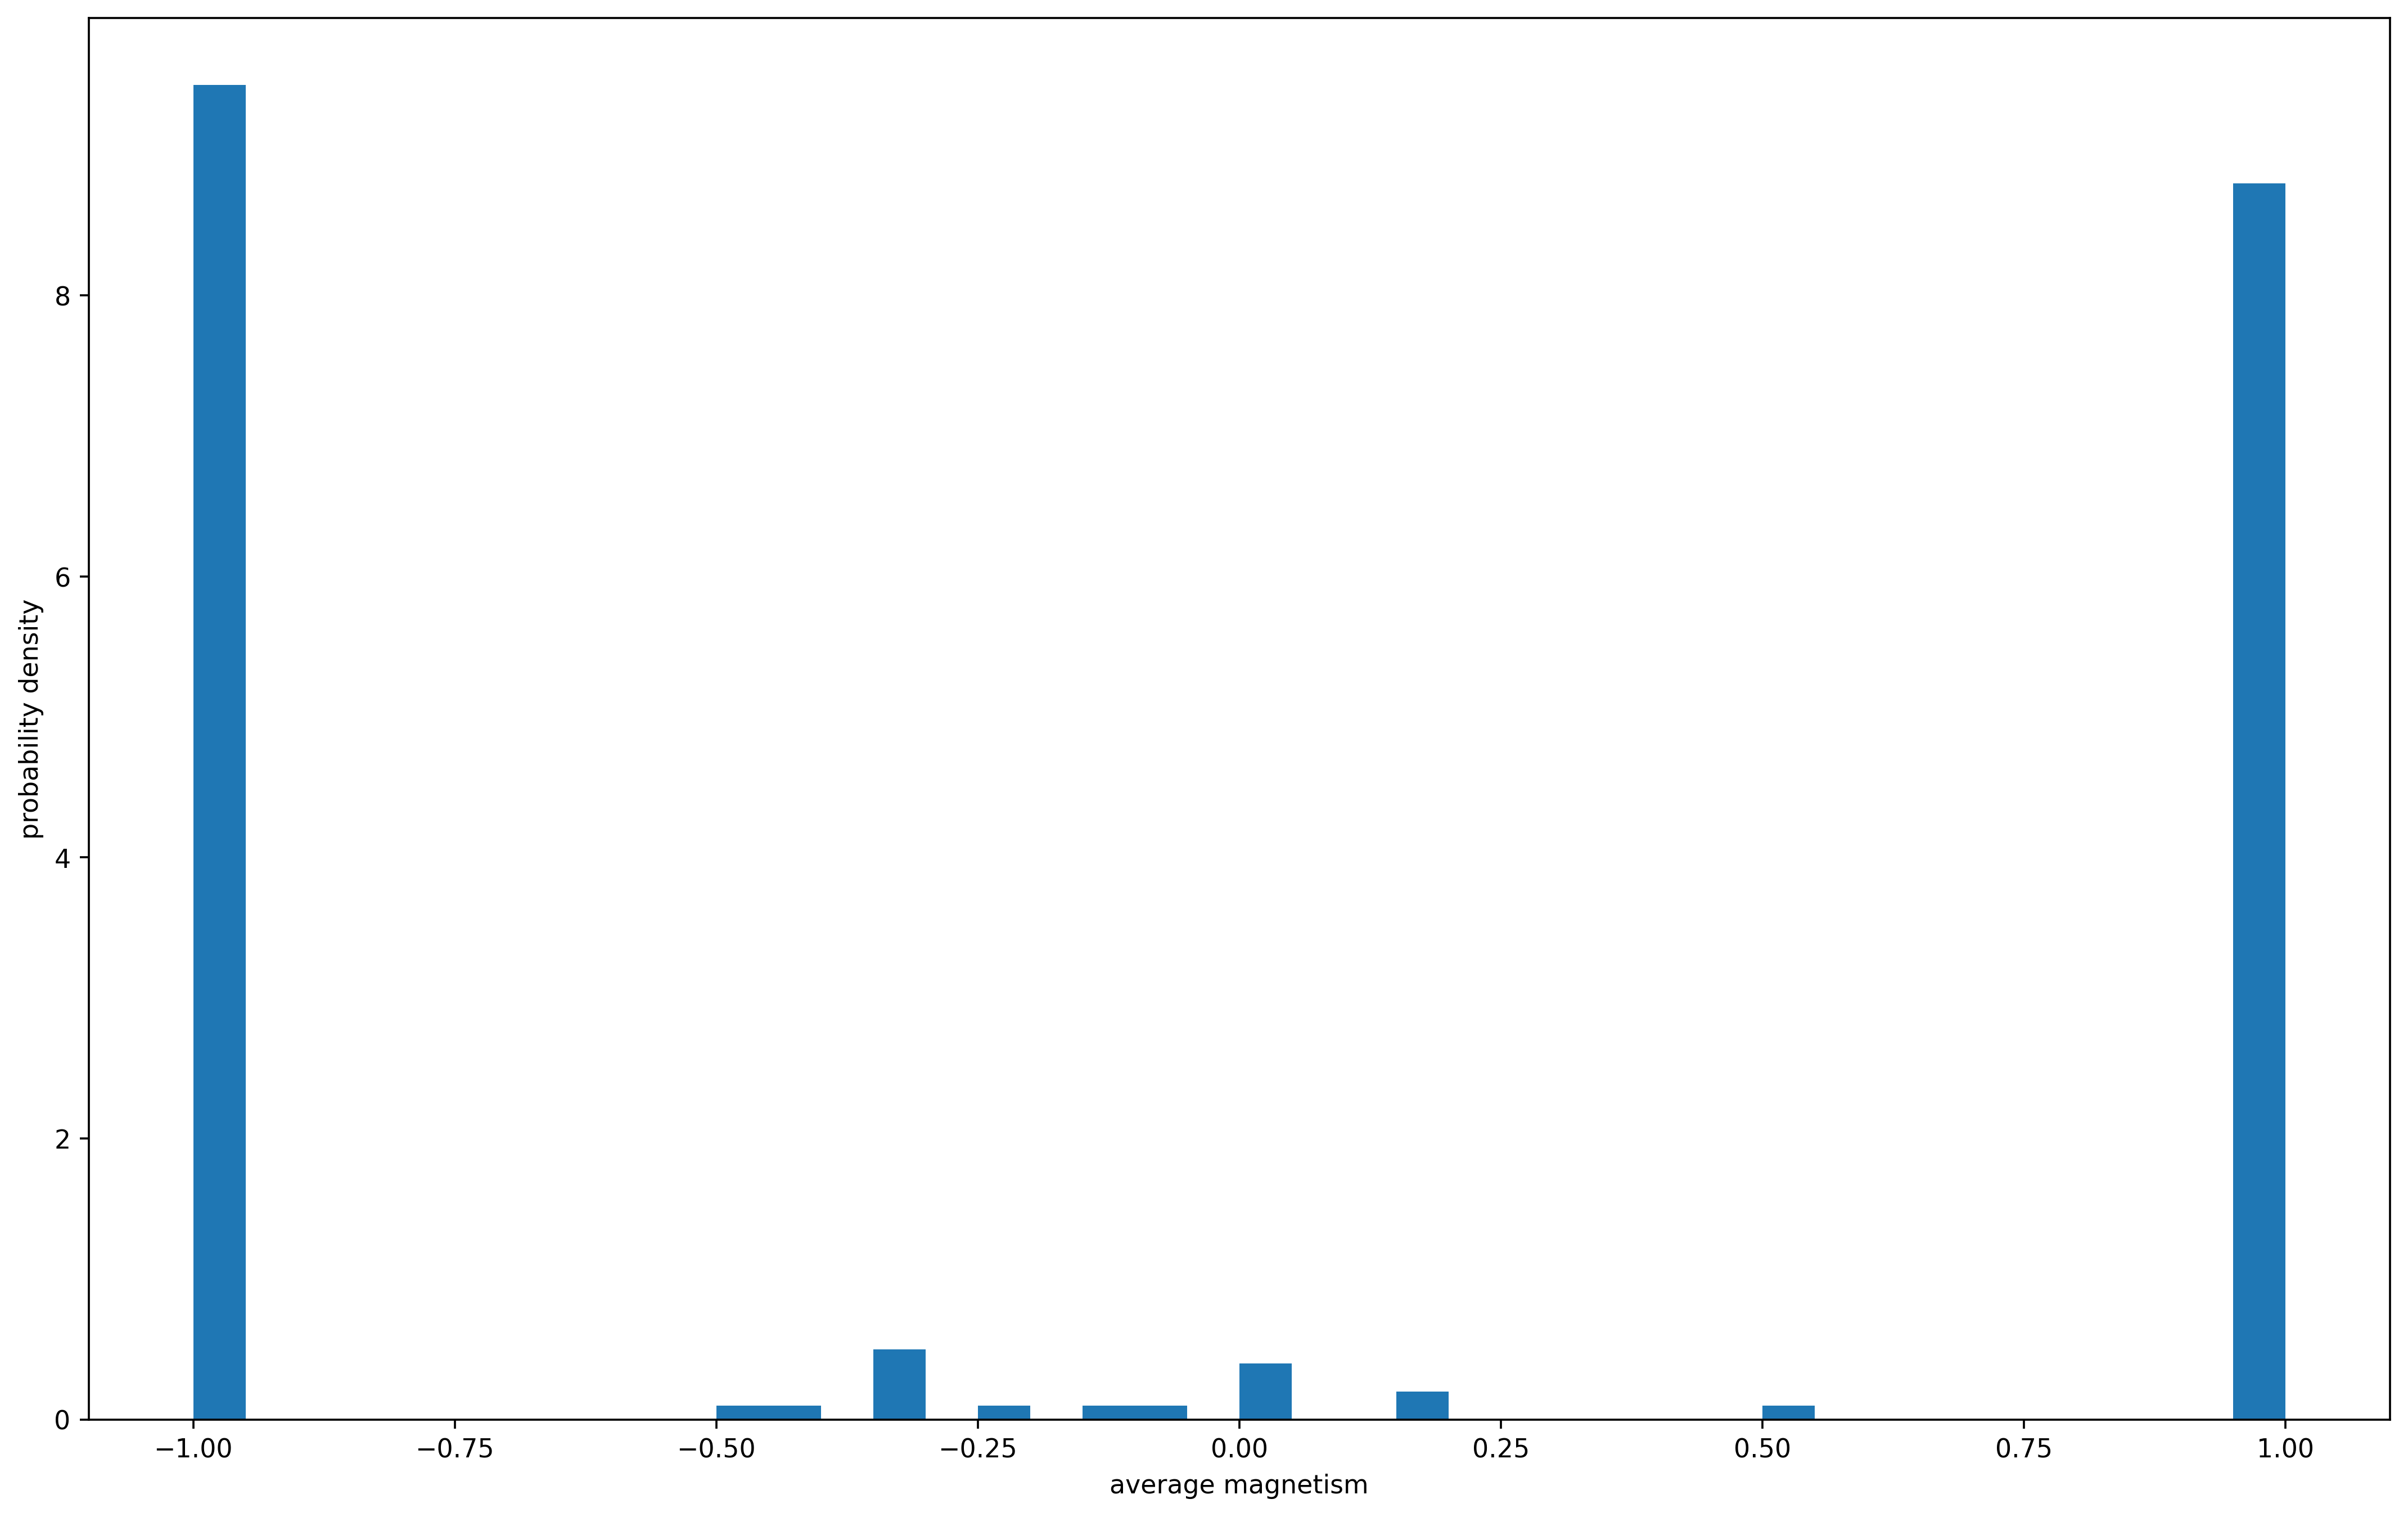

In [21]:
plt.figure(figsize=(16, 10), dpi=330)
plt.hist(avg_magns_2, bins=40, density=True)
plt.xlabel('average magnetism')
plt.ylabel('probability density')
plt.show()